# Computer Vision

- **Purpose**: Create a user-friendly manual for beginners or enthusiasts to learn computer vision with Python tools like OpenCV and Pillow.

- **Components**: Include technical explanations, step-by-step tutorials, and full project implementations for both image and video processing.

- **Prepared by:**
  - Ali Abedini
  - Shayan Kashefi
  - Parsa Naseri

# 1. OpenCV Basics

Example: Displaying an Image

From the OpenCV Docs:

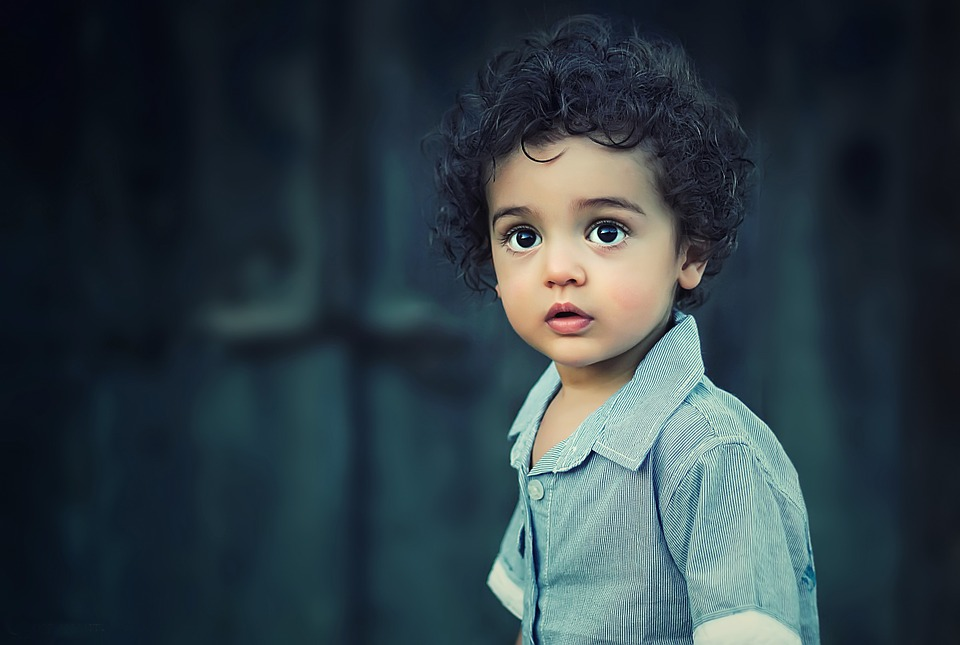

In [3]:
import cv2
from google.colab.patches import cv2_imshow

# Load an image
image = cv2.imread('example.jpg')

# Display the image
cv2_imshow(image)

# Wait for a key press and close the window
cv2.waitKey(0)
cv2.destroyAllWindows()


Example: Contour Detection

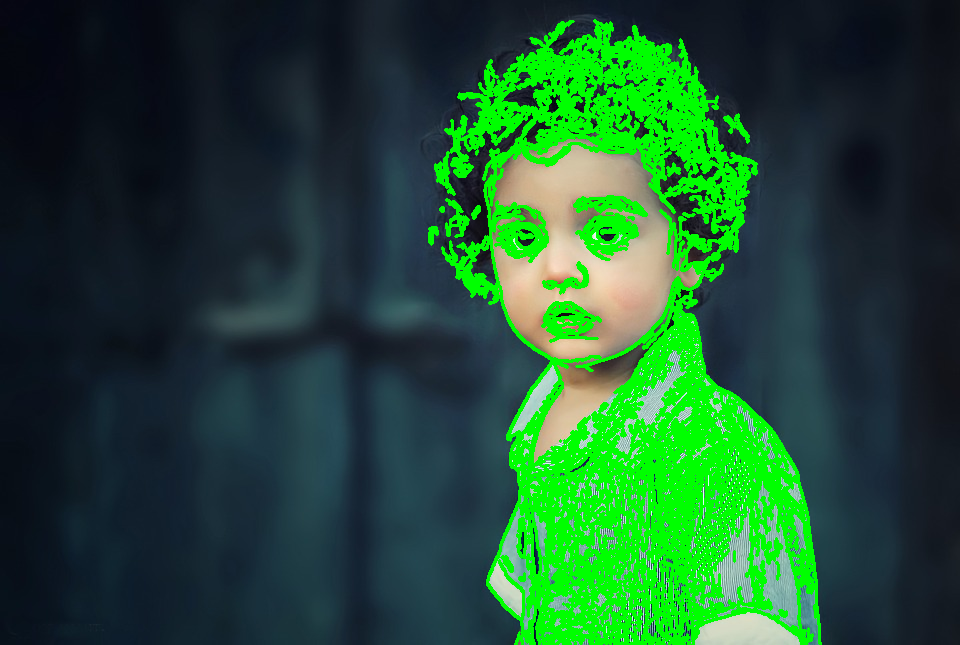

In [4]:
import cv2

image = cv2.imread('example.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Example: Real-Time Face Detection
From Learn OpenCV:

In [20]:
!pip install opencv-python-headless
!pip install opencv-python


In [21]:
from google.colab import files
import cv2

# Upload the video file
uploaded = files.upload()

# Use the uploaded file (e.g., 'video.mp4')
video_path = list(uploaded.keys())[0]

# Load the pre-trained Haar Cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start video capture from the uploaded file
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
output_path = 'output.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for AVI format
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Write the frame to the output video
    out.write(frame)

# Release resources
cap.release()
out.release()

# Download the output video
files.download(output_path)


Saving Einstein_1.mp4 to Einstein_1.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. Pillow Basics

Example: Opening, Rotating, and Saving an Image

From the Pillow Docs:

In [22]:
from PIL import Image

# Open an image file
image = Image.open('example.jpg')

# Rotate the image
rotated_image = image.rotate(45)

# Save the rotated image
rotated_image.save('rotated_example.jpg')
rotated_image.show()


Example: Creating a Thumbnail

In [23]:
from PIL import Image

image = Image.open('example.jpg')
image.thumbnail((100, 100))
image.save('thumbnail.jpg')


# 3. Project: Image Editor

Combining OpenCV and Pillow

Goal: A script for resizing and applying a filter to an image.

In [24]:
import cv2
from PIL import Image, ImageEnhance

# Load image using OpenCV
image = cv2.imread('example.jpg')

# Resize using OpenCV
resized_image = cv2.resize(image, (300, 300))

# Convert to Pillow Image for enhancements
pillow_image = Image.fromarray(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

# Apply brightness enhancement
enhancer = ImageEnhance.Brightness(pillow_image)
brightened_image = enhancer.enhance(1.5)

# Save the final image
brightened_image.save('edited_example.jpg')
brightened_image.show()


# 4. Advanced Computer Vision

Object Detection with Pre-trained YOLO Model

From PyImageSearch:

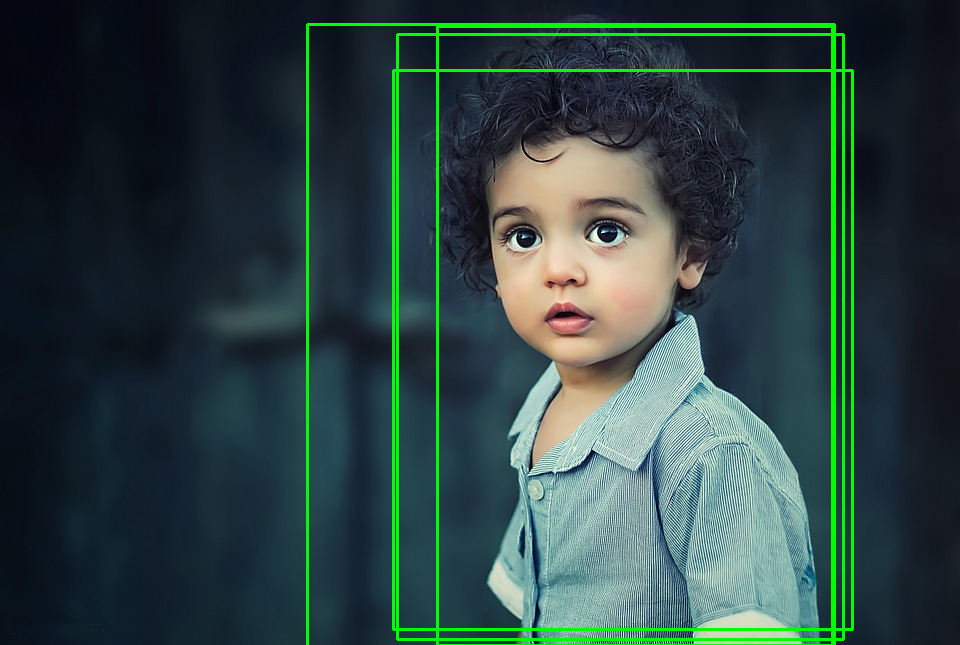

In [25]:
import cv2
import numpy as np

# Load YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

# Load image
image = cv2.imread("example.jpg")
height, width, channels = image.shape

# Prepare image for YOLO
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outputs = net.forward(output_layers)

# Process detections
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Draw bounding box
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# 5. Machine Learning in Computer Vision

MNIST Digit Classification Using OpenCV

From Coursera:

In [19]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X, y = mnist.data, mnist.target.astype(np.int)
X = np.array([cv2.resize(img.reshape(28, 28), (14, 14)).flatten() for img in X])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate
print("Accuracy:", clf.score(X_test, y_test))


URLError: <urlopen error [Errno 110] Connection timed out>

# 6. Dlib

Dlib is a modern C++ toolkit with Python bindings that excels in machine learning, image processing, and facial recognition.

Key Features: Facial landmarks, face recognition, object detection.

Example: Facial Landmark Detection

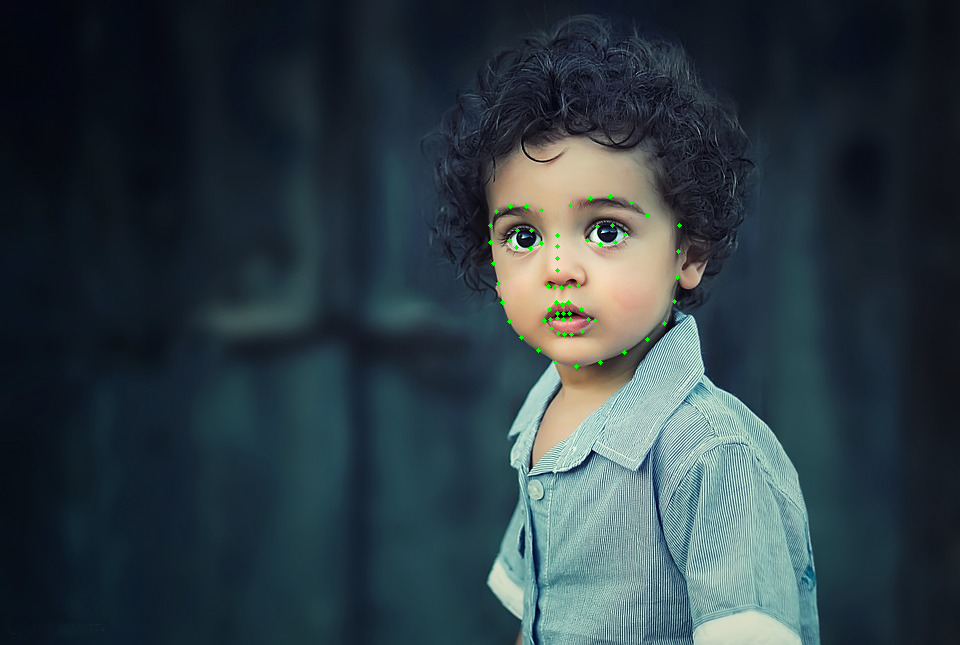

In [38]:
import dlib
import cv2

# Load pre-trained shape predictor
shape_predictor = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(shape_predictor)

# Read an image
image = cv2.imread("example.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = detector(gray)
for face in faces:
    landmarks = predictor(gray, face)
    for n in range(68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Example: Face Detection

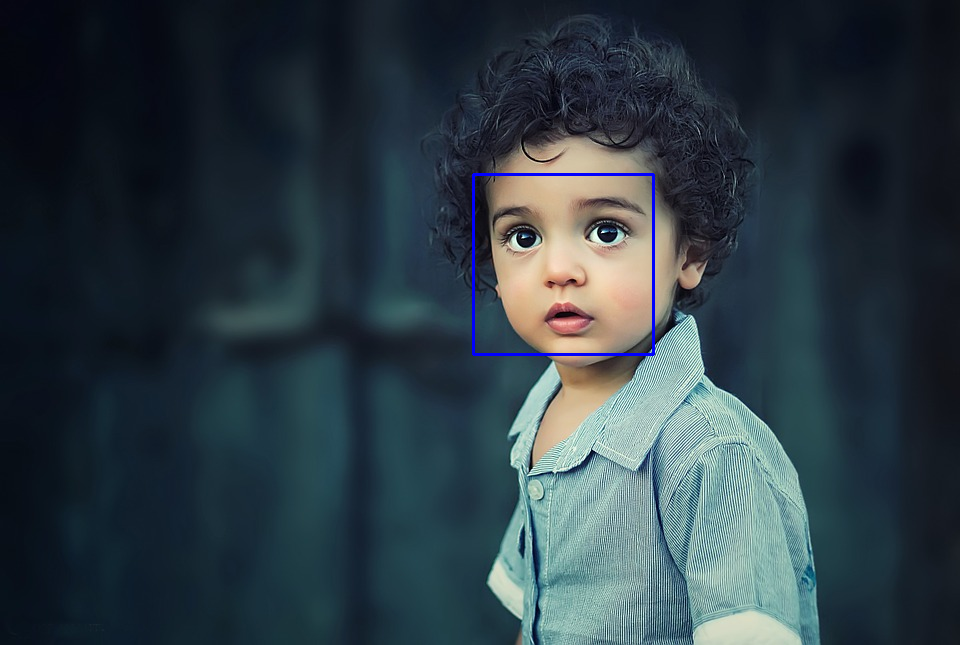

In [27]:
import dlib
import cv2

detector = dlib.get_frontal_face_detector()
image = cv2.imread('example.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = detector(gray)
for face in faces:
    x, y, w, h = (face.left(), face.top(), face.width(), face.height())
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# 7. Scikit-Image
Scikit-Image is a library built on NumPy and SciPy, designed for advanced image processing tasks like segmentation, transformations, and filtering.

Key Features: Robust preprocessing and feature extraction tools.

Example: Edge Detection Using Canny Algorithm

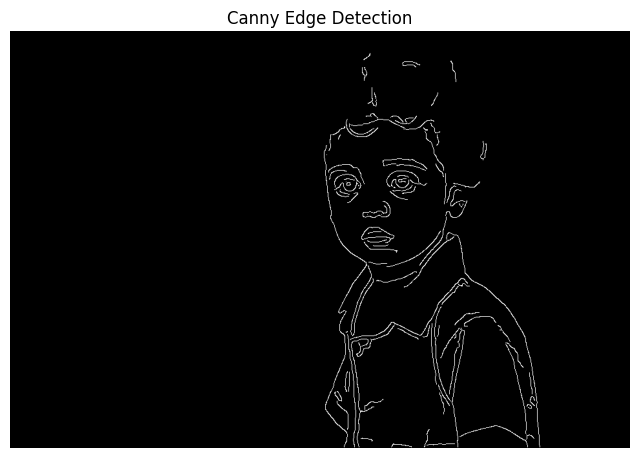

In [28]:
from skimage import io, feature, color
import matplotlib.pyplot as plt

# Load and convert image to grayscale
image = io.imread('example.jpg')
gray_image = color.rgb2gray(image)

# Apply Canny edge detection
edges = feature.canny(gray_image, sigma=2.0)

# Display results
plt.figure(figsize=(8, 8))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()


Example: Histogram Equalization

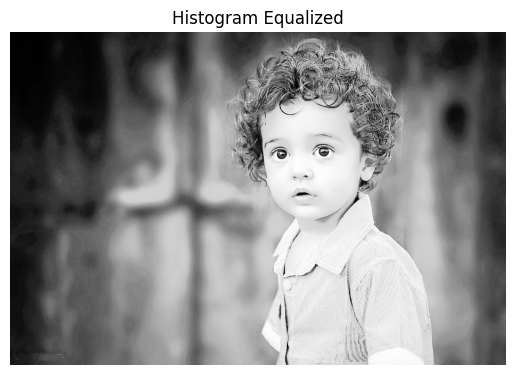

In [29]:
from skimage import io, exposure, color
import matplotlib.pyplot as plt

image = io.imread('example.jpg', as_gray=True)
equalized = exposure.equalize_hist(image)

plt.imshow(equalized, cmap='gray')
plt.title('Histogram Equalized')
plt.axis('off')
plt.show()


Example: Image Segmentation with Watershed Algorithm

In [32]:
from skimage import io, color
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = io.imread('example.jpg', as_gray=True)

image_int = image.astype(np.int32)

# Generate a boolean mask for local maxima
local_max_mask = peak_local_max(
    -image,
    footprint=np.ones((3, 3)),
    labels=image_int,
    min_distance=10  # Adjust this parameter as needed
)

# Check if local_max_mask is empty
if not np.any(local_max_mask):
    raise ValueError("No local maxima found. Check the input image or adjust parameters.")

# Debug: Visualize local maxima
plt.imshow(local_max_mask, cmap='gray')
plt.title("Local Maxima Mask")
plt.show()

# Generate markers for watershed
markers = ndimage.label(local_max_mask)[0]

# Debug: Check the markers
print(f"Markers shape: {markers.shape}, Image shape: {image.shape}")

# Ensure markers and image shapes match
if markers.shape != image.shape:
    raise ValueError(f"Shape mismatch: markers {markers.shape}, image {image.shape}")

# Apply watershed segmentation
segmented = watershed(-image, markers, mask=image.astype(bool))

# Display the segmented regions
plt.imshow(segmented, cmap='nipy_spectral')
plt.title("Segmented Image")
plt.show()


ValueError: No local maxima found. Check the input image or adjust parameters.

# 8. TensorFlow and Keras (For Deep Learning)
TensorFlow and Keras are frameworks for building and training deep learning models, often used for image classification, object detection, and more.

Example: Image Classification with Pre-trained MobileNetV2

In [30]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load a pre-trained model
model = MobileNetV2(weights='imagenet')

# Load and preprocess the image
image = load_img('example.jpg', target_size=(224, 224))
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array = preprocess_input(image_array)

# Predict the class
predictions = model.predict(image_array)
decoded_predictions = decode_predictions(predictions, top=3)

# Display predictions
for _, label, confidence in decoded_predictions[0]:
    print(f"{label}: {confidence*100:.2f}%")


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
cardigan: 36.61%
kimono: 36.36%
stole: 2.41%


Example: Training a Simple CNN for MNIST Digits

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Build model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.8877 - loss: 0.4021
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9756 - loss: 0.0865
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9829 - loss: 0.0600
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9857 - loss: 0.0507
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9878 - loss: 0.0412
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9761 - loss: 0.0718


[0.058390699326992035, 0.980400025844574]

# 9. PyTorch
PyTorch is a deep learning framework often used for custom neural networks and advanced computer vision tasks.

Example: Image Classification Using TorchVision’s ResNet

In [35]:
import torch
from torchvision import models, transforms
from PIL import Image

# Load pre-trained ResNet model
model = models.resnet50(pretrained=True)
model.eval()

# Preprocess the image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

image = Image.open('example.jpg')
image_tensor = transform(image).unsqueeze(0)

# Predict
with torch.no_grad():
    outputs = model(image_tensor)
    _, predicted = outputs.max(1)
    print(f"Predicted class index: {predicted.item()}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 122MB/s]


Predicted class index: 903


Example: Transfer Learning with ResNet

In [36]:
import torch
from torchvision import models, transforms
from PIL import Image

# Load pre-trained ResNet model
model = models.resnet18(pretrained=True)
model.eval()

# Preprocess an image
transform = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor()])
image = Image.open("example.jpg")
image = transform(image).unsqueeze(0)

# Predict
with torch.no_grad():
    outputs = model(image)
    _, predicted = outputs.max(1)
print(f"Predicted Class: {predicted.item()}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 120MB/s]


Predicted Class: 869


# 10. SimpleITK
SimpleITK is designed for medical image processing and includes advanced techniques like registration and segmentation.

Key Features: Works with DICOM and other medical imaging formats.

Example: Reading and Displaying a Medical Image

In [37]:
!pip install SimpleITK


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 14.7 MB/s eta 0:00:00


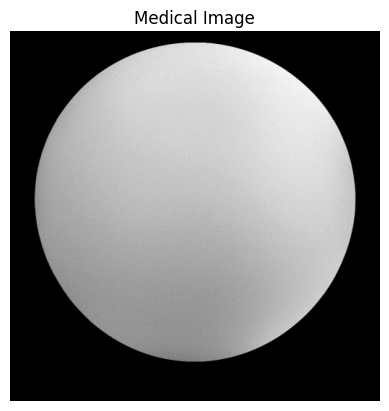

In [39]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Read a medical image
image = sitk.ReadImage("medical_image.dcm")

# Convert to numpy array for visualization
image_array = sitk.GetArrayFromImage(image)

# Display the image
plt.imshow(image_array[0], cmap='gray')
plt.title("Medical Image")
plt.axis('off')
plt.show()


Example: Image Smoothing (Gaussian Blur)

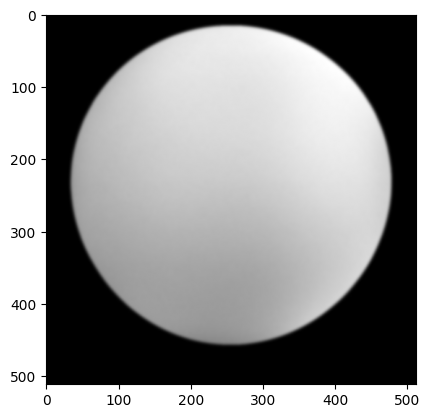

In [40]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

image = sitk.ReadImage('medical_image.dcm')
smoothed = sitk.SmoothingRecursiveGaussian(image, sigma=2)

plt.imshow(sitk.GetArrayFromImage(smoothed)[0], cmap='gray')
plt.show()


# 11. Mediapipe
Mediapipe, developed by Google, is a library for real-time face, hand, and pose tracking.

Key Features: Pre-trained models for real-time applications.

Example: Hand Detection

In [43]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 23.5 MB/s eta 0:00:00


In [31]:
import mediapipe as mp
import cv2

mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils

# Start video capture
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    cv2.imshow('Hand Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Example: Pose Estimation

In [32]:
import mediapipe as mp
import cv2

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(frame_rgb)

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    cv2.imshow('Pose Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Example: Real-Time Face Mesh Detection

In [33]:
import cv2
import mediapipe as mp

mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)
with mp_face_mesh.FaceMesh(max_num_faces=1) as face_mesh:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(frame_rgb)

        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(frame, face_landmarks, mp_face_mesh.FACE_CONNECTIONS)

        cv2.imshow('Face Mesh', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


# 12. Albumentations
Albumentations is a fast and flexible library for data augmentation.

Key Features: Advanced augmentation techniques for images.

Example: Augmenting an Image

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


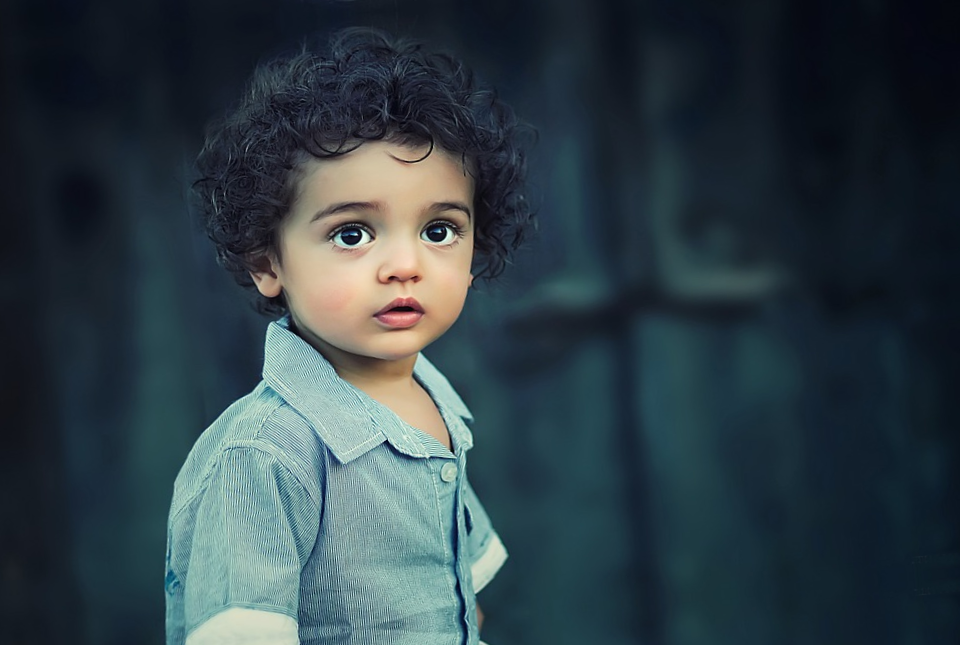

In [34]:
import cv2
import albumentations as A
from albumentations.core.composition import OneOf
from albumentations.augmentations import transforms

# Define augmentations
augmentation = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
])

# Load image
image = cv2.imread("example.jpg")

# Apply augmentations
augmented = augmentation(image=image)
cv2_imshow(augmented['image'])
cv2.waitKey(0)
cv2.destroyAllWindows()


Example: Data Augmentation

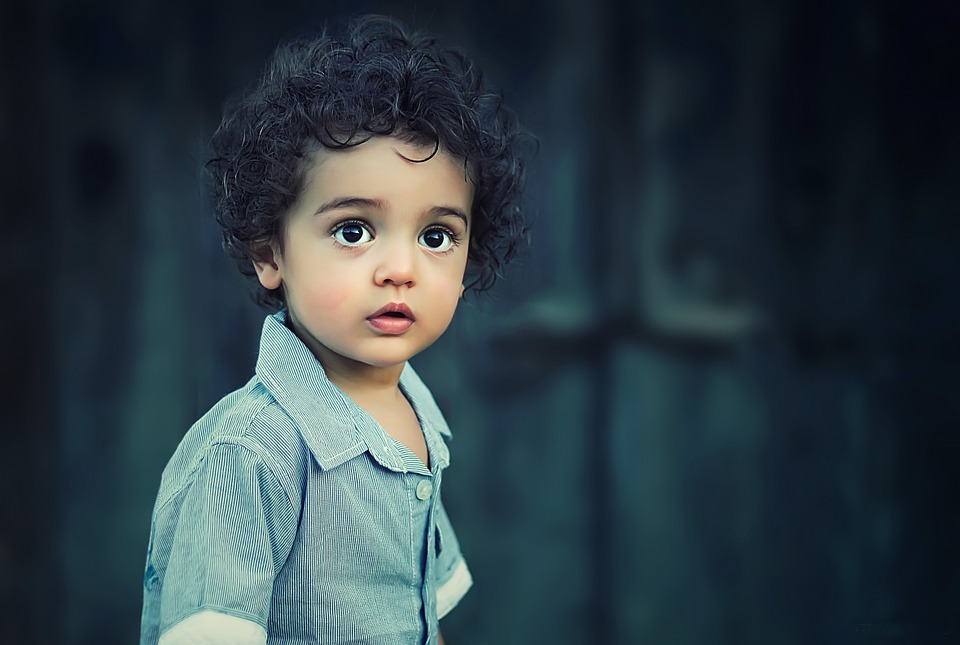

In [35]:
import cv2
from albumentations import Compose, RandomBrightnessContrast, ShiftScaleRotate, HorizontalFlip

image = cv2.imread('example.jpg')
augmentations = Compose([
    HorizontalFlip(p=0.5),
    RandomBrightnessContrast(p=0.2),
    ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
])

augmented = augmentations(image=image)['image']
cv2_imshow(augmented)
cv2.waitKey(0)
cv2.destroyAllWindows()


Example: Applying Multiple Augmentations

<ipython-input-36-2b74ecdefef8>:11: DeprecationWarning: Flip is deprecated. Consider using HorizontalFlip, VerticalFlip, RandomRotate90 or D4.
  Flip(p=0.5),


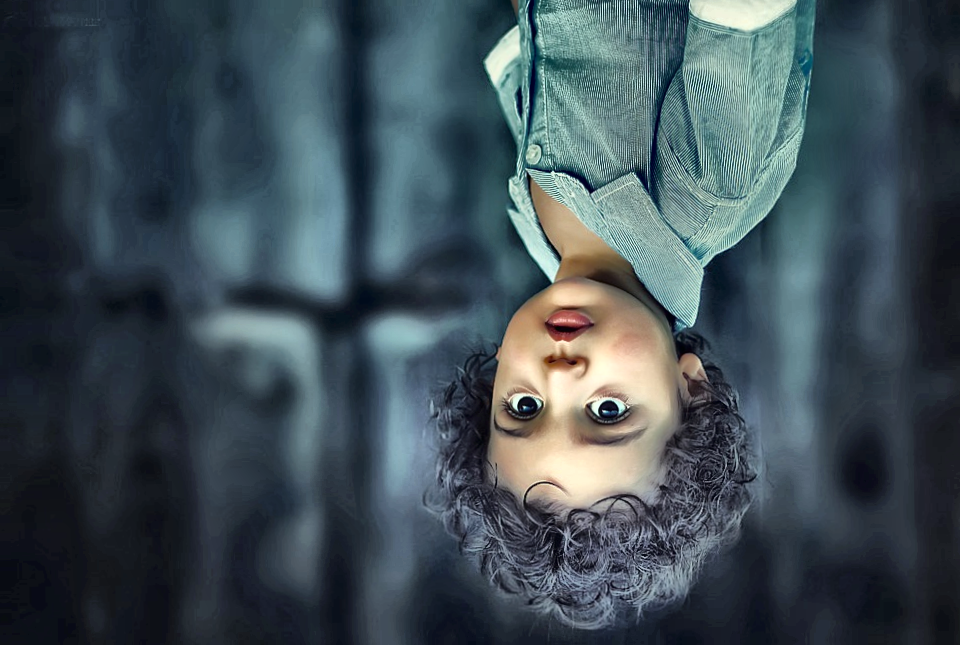

In [36]:
import cv2
from albumentations import Compose, Blur, CLAHE, Flip, Rotate

# Load the image
image = cv2.imread('example.jpg')

# Define augmentations
augmentations = Compose([
    Blur(blur_limit=3, p=0.5),
    CLAHE(clip_limit=4.0, p=0.5),
    Flip(p=0.5),
    Rotate(limit=45, p=0.5),
])

# Apply augmentations
augmented = augmentations(image=image)['image']

# Show the result
cv2_imshow(augmented)
cv2.waitKey(0)
cv2.destroyAllWindows()


# 13. Detectron2
Example: Object Detection

In [2]:
!pip install git+https://github.com/facebookresearch/detectron2.git


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-h2efrlaf
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-h2efrlaf
  Resolved https://github.com/facebookresearch/detectron2.git to commit 9604f5995cc628619f0e4fd913453b4d7d61db3f
  Preparing metadata (setup.py) ... done
  Using cached fvcore-0.1.5.post20221221-py3-none-any.whl
  Attempting uninstall: fvcore
    Found existing installation: fvcore 0.1.1.dev200512
    Uninstalling fvcore-0.1.1.dev200512:
      Successfully uninstalled fvcore-0.1.1.dev200512


In [4]:
!pip install fvcore==0.1.1.dev200512

  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.1.dev200512-py3-none-any.whl size=40855 sha256=83d3f4c1ea644e2f92efd4ea385d578715a437cb5a39d390c28ffae05beba701
  Stored in directory: /root/.cache/pip/wheels/d9/06/dd/45fbf0c83e2544d7d6f93d830bb15d310c3a2e4dc764457589
Successfully built fvcore
  Attempting uninstall: fvcore
    Found existing installation: fvcore 0.1.5.post20221221
    Uninstalling fvcore-0.1.5.post20221221:
      Successfully uninstalled fvcore-0.1.5.post20221221
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
detectron2 0.6 requires fvcore<0.1.6,>=0.1.5, but you have fvcore 0.1.1.dev200512 which is incompatible.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


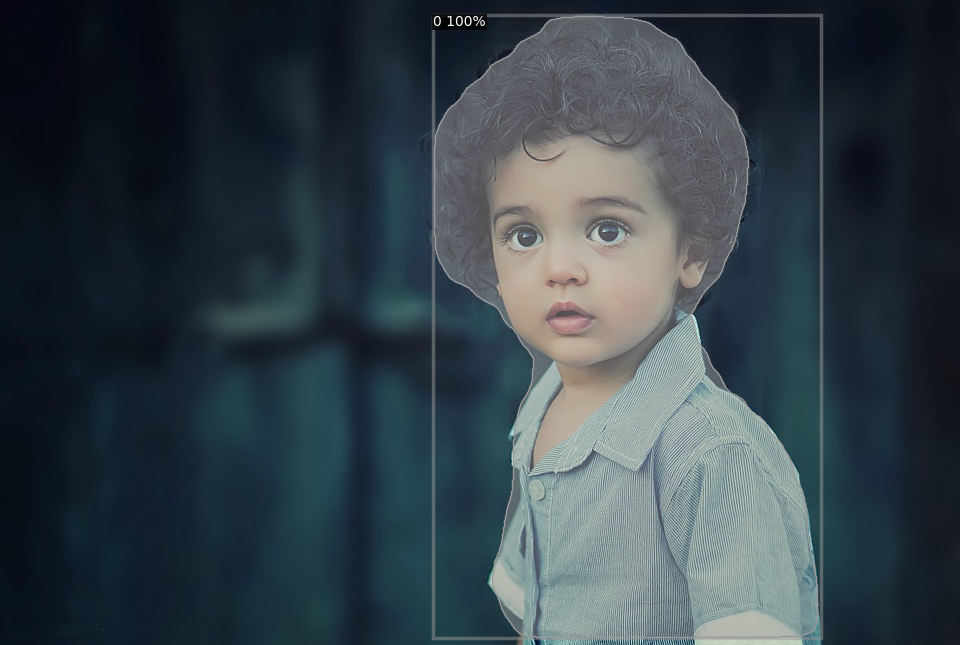

In [5]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
import cv2
from google.colab import drive

drive.mount('/content/drive')


cfg = get_cfg()
cfg.merge_from_file("/content/drive/My Drive/detectron2-main/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

predictor = DefaultPredictor(cfg)
image = cv2.imread("example.jpg")
outputs = predictor(image)

v = Visualizer(image[:, :, ::-1], metadata=None)
output_image = v.draw_instance_predictions(outputs["instances"].to("cpu"))

cv2_imshow(output_image.get_image()[:, :, ::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()


# 14. Open3D
Purpose:
Open3D focuses on 3D data visualization and manipulation, including point cloud operations.

Example: Visualizing a Point Cloud

In [6]:
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 111.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.8 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: flask
    Found existing installation: Flask 3.1.0
    Uni

In [9]:
import open3d as o3d

# Load a point cloud
pcd = o3d.io.read_point_cloud("point_cloud.ply")

# Save point cloud to a file
o3d.io.write_point_cloud("saved_point_cloud.ply", pcd)

# Visualize the point cloud
o3d.visualization.draw_geometries([pcd])


[Open3D WARNING] GLFW initialized for headless rendering.
[Open3D WARNING] GLFW Error: OSMesa: Library not found
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


# 15. Kornia
Purpose:
Kornia is a PyTorch-based library for differentiable image transformations. It’s used for tasks that require backpropagation through vision operations.

Example: Differentiable Image Rotation

In [11]:
!pip install kornia

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 80.4 MB/s eta 0:00:00


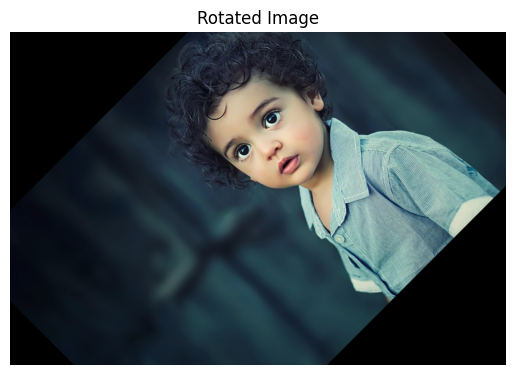

In [12]:
import torch
import kornia
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load an image
image = Image.open("example.jpg")
image_tensor = torch.tensor(np.array(image)).permute(2, 0, 1).float() / 255.0
image_tensor = image_tensor.unsqueeze(0)

# Rotate the image
angle = torch.tensor([45.0])  # Rotate 45 degrees
rotated_image = kornia.geometry.transform.rotate(image_tensor, angle)

# Visualize
rotated_image_np = rotated_image.squeeze(0).permute(1, 2, 0).numpy()
plt.imshow(rotated_image_np)
plt.title("Rotated Image")
plt.axis('off')
plt.show()


Project 1: Real-Time Object Detection with YOLOv4

Goal: Detect objects in real-time using a webcam and YOLOv4.

Saving Jobs_2.mp4 to Jobs_2.mp4


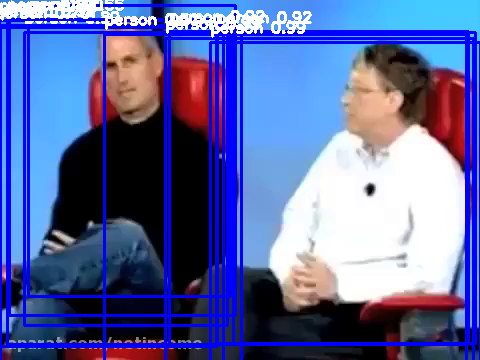

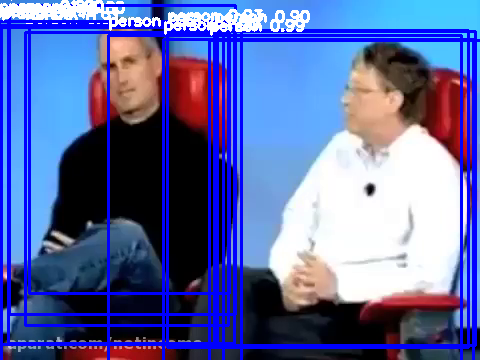

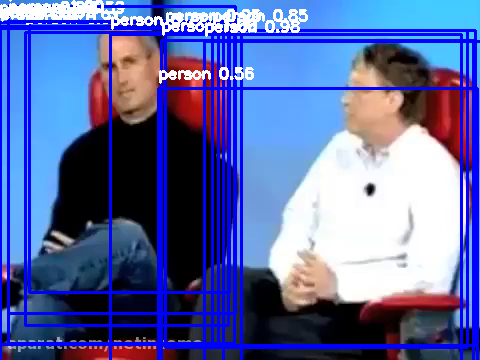

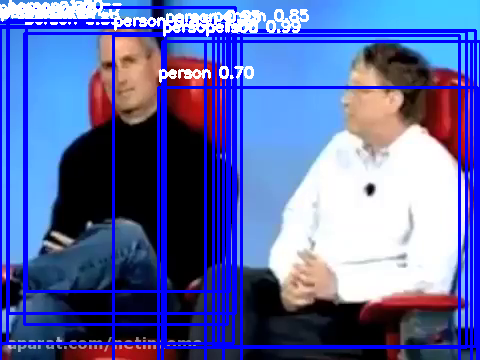

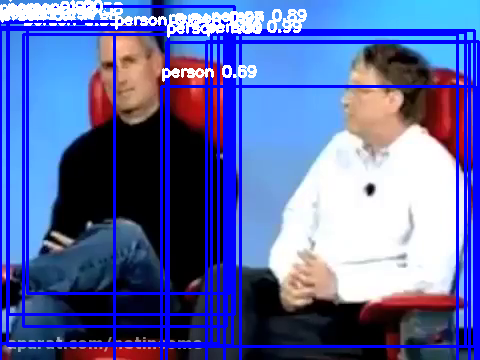

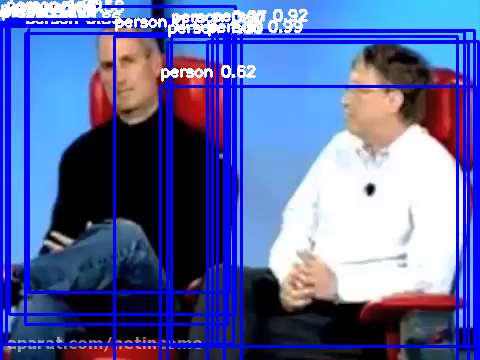

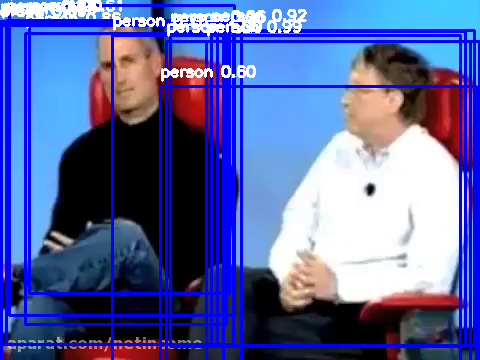

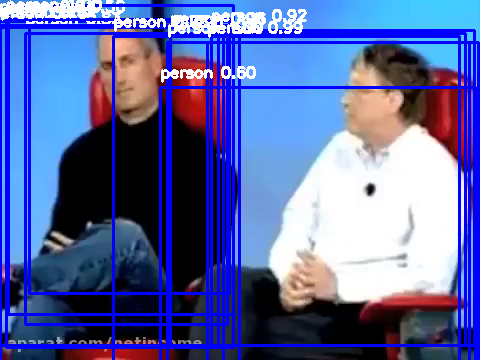

KeyboardInterrupt: 

In [16]:
import cv2
import numpy as np
from google.colab import files

# Load YOLO model
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]


uploaded = files.upload()
video_path = list(uploaded.keys())[0]
cap = cv2.VideoCapture(video_path)
# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

while True:
    ret, frame = cap.read()
    height, width, channels = frame.shape

    # Preprocess image
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outputs = net.forward(output_layers)

    # Parse detections
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Draw bounding box
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
                cv2.putText(frame, f"{classes[class_id]} {confidence:.2f}", (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    cv2_imshow(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Project 2: Image Classification with Pre-Trained MobileNet

Goal: Classify an image using MobileNet with TensorFlow.

In [17]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the model
model = MobileNet(weights='imagenet')

# Load and preprocess the image
image = load_img('example.jpg', target_size=(224, 224))
image_array = img_to_array(image)
image_array = preprocess_input(image_array)
image_array = tf.expand_dims(image_array, axis=0)

# Predict the class
predictions = model.predict(image_array)
decoded_predictions = decode_predictions(predictions, top=3)

for idx, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
    print(f"{idx+1}. {label}: {score*100:.2f}%")


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
1. jean: 28.12%
2. theater_curtain: 21.58%
3. cardigan: 11.64%


Project 3: Real-Time Pose Estimation with Mediapipe

Goal: Create a system to estimate human pose in real-time.

In [18]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 18.6 MB/s eta 0:00:00


In [19]:
import cv2
import mediapipe as mp

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(frame_rgb)

        if results.pose_landmarks:
            mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        cv2.imshow('Pose Estimation', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()
